<hr>

</hr>
<br>
</br>

<img src="http://www.stickpng.com/assets/images/580b57fcd9996e24bc43c513.png" width="400">
<br>
</br>
<br>
</br>

Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. The company does not own any lodging; it is merely a broker and receives percentage service fees (commissions) from both guests and hosts in conjunction with every booking. In this project, I aim to use algorithms and libraries to mine the reviews people have submitted on Singapore AirBnB rentals in order to provide descriptive analytics.


<h2> Load File </h2>

To start off, I imported and loaded the `airbnb_data.csv` as <b>a list of dictionaries</b> into a new variable called `airbnb_data`.

In [2]:
# Read file into a list called airbnb_data

import csv
airbnb_data = []
with open('airbnb_data.csv') as f:
    reader = csv.DictReader(f,delimiter=',')
    for row in reader:
        airbnb_data.append(dict(row))
    
airbnb_data[0]

{'listing_id': '1133718',
 'survey_id': '1280',
 'host_id': '6219420',
 'room_type': 'Shared room',
 'country': '',
 'city': 'Singapore',
 'borough': '',
 'neighborhood': 'MK03',
 'reviews': '9',
 'overall_satisfaction': '4.5',
 'accommodates': '12',
 'bedrooms': '1.0',
 'bathrooms': '',
 'price': '74.0',
 'minstay': '',
 'last_modified': '2017-05-17 09:10:25.431659',
 'latitude': '1.293354',
 'longitude': '103.769226',
 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}

## Data Cleaning 
As previewed above, all key-value pairs were in type: string.

However, there are certain columns with data that I want to be in type: float instead to work better with for data analysis.

I will clean the following columns to their appropriate types: **overall_satisfaction, price, longtitude, latitude, reviews**

In [3]:
for row in airbnb_data:
    row['overall_satisfaction'] = float(row['overall_satisfaction'])
    row['price'] = float(row['price'])
    row['reviews'] = float(row['reviews'])
    row['latitude'] = float(row['latitude'])
    row['longitude'] = float(row['longitude'])
    
print(airbnb_data[0])

{'listing_id': '1133718', 'survey_id': '1280', 'host_id': '6219420', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'MK03', 'reviews': 9.0, 'overall_satisfaction': 4.5, 'accommodates': '12', 'bedrooms': '1.0', 'bathrooms': '', 'price': 74.0, 'minstay': '', 'last_modified': '2017-05-17 09:10:25.431659', 'latitude': 1.293354, 'longitude': 103.769226, 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}


## Exploratory Data Analysis 

**List out each neighborhoods and their corresponding number of listings **

*My approach:* Counting with dictionaries, where key is neigbhorhood id, value is counts.

*e.g. Expected Output:*
```python
    print(results['TS17']) # 342 counts.
```

In [4]:
#Write code below

results ={}

for row in airbnb_data:
    neighbourhood_id = row["neighborhood"]
    
    if neighbourhood_id not in results:
        results[neighbourhood_id] = 1
    else:
        results[neighbourhood_id] += 1
print(results["TS17"])

342


**List out each neighborhood and their average overall_satisfaction**

I have filtered out listings whose reviews are 0.

<i> My approach:
1. Create 2 dictionaries
    - Dictionary 1: Key is neighborhood, value is an accumulation of scores
    - Dictionary 2: Key is neighborhood, value is an accumulation of counts
2. Create 3rd dictionary
3. Loop through 1 dictionary (using 1 for loop only because both share same key!), calculate average and store in 3rd dictionary
</i>

*Expected Output:*
```python
    print(results['TS17']) # average score of 2.859447004608295.
```

In [60]:
neighbourhood_scores = {}
neighbourhood_counts = {}
results = {}

for row in airbnb_data:
    if row["reviews"] > 0:
        neighbourhood_id = row["neighborhood"]
        satisfaction = row["overall_satisfaction"]
    
        if neighbourhood_id not in neighbourhood_counts:
            neighbourhood_counts[neighbourhood_id] = 1
            neighbourhood_scores[neighbourhood_id] = satisfaction
        else:
            neighbourhood_counts[neighbourhood_id] += 1
            neighbourhood_scores[neighbourhood_id] += satisfaction

for neighbourhood_id,scores in neighbourhood_scores.items():
    counts= neighbourhood_counts[neighbourhood_id]

    average = scores / counts
    if neighbourhood_id not in results:
        results[neighbourhood_id] = average

print(results["TS17"])

2.859447004608295


**List out each neighborhood and their average price**

*e.g. Expected Output:*
```python
    print(results['TS17']) # it should give you an average price of 95.5672514619883.
```

In [6]:
neighbourhood_price = {}
neighbourhood_counts = {}
results = {}

for row in airbnb_data:
        neighbourhood_id = row["neighborhood"]
        price = row["price"]
    
        if neighbourhood_id not in neighbourhood_counts:
            neighbourhood_counts[neighbourhood_id] = 1
            neighbourhood_price[neighbourhood_id] = price
        else:
            neighbourhood_counts[neighbourhood_id] += 1
            neighbourhood_price[neighbourhood_id] += price

for neighbourhood_id,price in neighbourhood_price.items():
    counts= neighbourhood_counts[neighbourhood_id]

    average = price / counts
    if neighbourhood_id not in results:
        results[neighbourhood_id] = average

print(results["TS17"])

95.5672514619883


**Plot a distribution of counts of the overall_satisfaction **
<b>I have filtered out listings whose reviews are 0. </b>

{4.5: 1435, 5.0: 1032, 0.0: 1408, 4.0: 476, 3.5: 155, 2.5: 12, 3.0: 44, 2.0: 3, 1.0: 1, 1.5: 1}


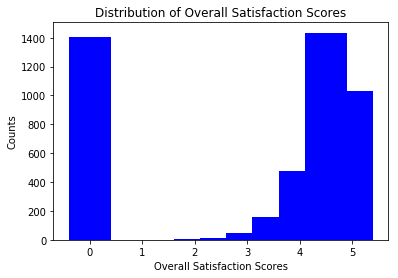

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np
import seaborn as sns

result = {}
for row in airbnb_data:
    satisfaction = row["overall_satisfaction"]
    if row["reviews"] != 0:
        if satisfaction not in result:
            result[satisfaction] = 1
        else:
            result[satisfaction] += 1

print(result)
plt.bar(result.keys(), result.values(), color= "blue")
plt.title("Distribution of Overall Satisfaction Scores", color = "black")
plt.xticks(rotation = "horizontal")
plt.xlabel("Overall Satisfaction Scores")
plt.ylabel("Counts")
plt.show()

**Plot a geographical representation of all of the listings in Singapore**

<i> My approach:
1. Create a list for latitude
2. Create a list for longitude
3. Append each listing's latitude and logitude to the lists
4. Plot a scatter plot using both lists
</i>

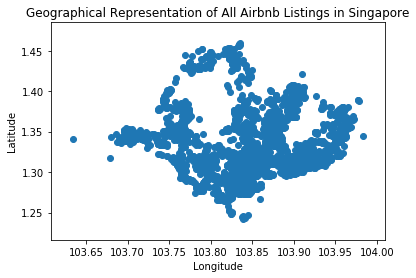

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

lat = []
lon = []

for data in airbnb_data:
    lat.append(data["latitude"])
    lon.append(data["longitude"])

fig, ax = plt.subplots()

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Representation of All Airbnb Listings in Singapore", color = "black")

s=plt.scatter(lon, lat)

plt.show()

# AirBnB Visualisation and Price Recommender App

Based on the earlier EDA, we have seen that it is not modular and does not allow the AirBnB team to look into each neighborhood. I will now build a simple application to improve the earlier EDA while serving 2 types of users: Guests and Hosts. 


**Objective: Develop an app which will serve the 2 main users:**
1. Guests
    - Visualisation tool to recommend them the best listings based on price and overall satisfaction score in a neighborhood
2. Hosts
    - Recommend a price to set for their listing in a given neighborhood based on better performing listings

<hr></hr>

<h2> Building the App </h2>

To begin building the App, there are 2 things I need to do:
1. Build the functions
2. Test the functions 

### `get_all_latitudes()` - Functions to get all latitudes given a list of listing_ids 


<i> My approach:
1. Create a dic dictionary
2. Extract the latitude and listing id of each row and listing id into dic.key, latitude into dic.value
3. Create a result list
4. Check listing id exists within dic.value
5. If true, append the latitude into the results list
6. Return results list
</i>

<b>Input</b>: `airbnb_data` as `data`, a `list` of listing_ids

<b>Return</b>: A `list` of latitudes


In [16]:
def get_all_latitude(data, listing_ids):
    dic= {}
    for row in airbnb_data:
        listing_id = row["listing_id"]
        latitude = row["latitude"]
        dic[listing_id] = [latitude]
    result = []
    for i in listing_ids:
        for k,v in dic.items():
            if i == k:
                result.append(v)
                
    return result

<b>Tester Cell</b> - To test the above function to see if it's working.

<b>Expected Output:</b>

    [1.305702, 1.296138, 1.304393]

In [17]:
get_all_latitude(airbnb_data, ['10350448','13507262','13642646'])

[[1.305702], [1.296138], [1.304393]]

### `get_all_longitudes()` - Functions to get all longitudes given a list of listing_ids <font color='red'>(5 marks)</font>


<i> My approach:
1. Create a dic dictionary
2. Extract the longitude and listing id of each row and listing id into dic.key, longitude into dic.value
3. Create a result list
4. Check listing id exists within dic.value
5. If true, append the longitude into the results list
6. Return results list
</i>

<b>Input</b>: `airbnb_data` as `data`, a `list` of listing_ids

<b>Return</b>: A `list` of longitudes

In [61]:
def get_all_longitude(data, listing_ids):
    dic= {}
    for row in airbnb_data:
        listing_id = row["listing_id"]
        longitude = row["longitude"]
        dic[listing_id] = [longitude]
    result = []
    for i in listing_ids:
        for k,v in dic.items():
            if i == k:
                result.append(v)
                
    return result

<b>Tester Cell</b> - To test the above function to see if it's working.

<b>Expected Output:</b>

    [103.79878, 103.767841, 103.784174]

In [20]:
get_all_longitude(airbnb_data, ['10350448','13507262','13642646'])

[[103.79878], [103.767841], [103.784174]]

### `listings_recommender()` - Function to recommend all listings based on a given price, satisfaction score and neighborhood 

Recommendation based on:
1. Lesser than or equal to that price
2. Equal or more than that overall satisfaction score
3. In that neighborhood

<i> My approach: 
1. Create a results list
2. Extract the relevant of each row
3. Check it satisfies all conditions passed into the function
4. If true, append the listing id into the results list
5. Return results list
</i>

<b>Input</b>: `airbnb_data` as `data`, price, overall_satisfaction, neighborhood_id

<b>Return</b>: A `list` of listing_ids

In [21]:
#Write code below
def listings_recommender(data, price, overall_satisfaction, neighborhood_id):
    result = []
    for row in airbnb_data:
        if price >= row["price"] and overall_satisfaction <= row["overall_satisfaction"] and neighborhood_id == row["neighborhood"]:
            result.append(row["listing_id"])
    return result
#         price = row["price"]
#         overall_satisfaction = row["overall_satisfaction"]
#         neighborhood_id = row["neighborhood_id"]
#         dic[listing_id] = [longitude]

<b>Tester Cell</b> - To test the above function to see if it's working.

<b>Expected Output:</b>

    ['10350448',
     '13507262',
     '13642646',
     '15099645',
     '6451493',
     '4696031',
     '2898794',
     '13181050',
     '9022211',
     '5200263',
     '6529707',
     '14433262']

In [22]:
listings_recommender(airbnb_data, 60, 5, 'MK03')

['10350448',
 '13507262',
 '13642646',
 '15099645',
 '6451493',
 '4696031',
 '2898794',
 '13181050',
 '9022211',
 '5200263',
 '6529707',
 '14433262']

### `price_recommender()` - Function to recommend a price in a neighborhood based on average price and overall satisfaction 

I now want to build a <b><i>simple</i></b> price recommendation function that will give a potential host a suggested price.

To build this, these are the requirements I wish to specify: 
1. Take all listings in that neighborhood and check for listings with a least 1 review and an overall satisfaction score of 4 or more.
2. From that filtered listings, calculate the average price and return that as the suggested price rounded to 2 decimal places.

<b>Input</b>: `airbnb_data` as `data`, a neighborhood_id

<b>Return</b>: A `float` of recommended price

In [62]:
from statistics import mean 

def price_recommender(data, neighborhood_id):
    prices = []
    for row in airbnb_data:
        if row["reviews"]  >= 1 and row["overall_satisfaction"] >= 4 and neighborhood_id == row["neighborhood"]:
            prices.append(row["price"])
    result = round(mean(prices),2)
    return result

<b>Tester Cell</b> - To test the above function to see if it's working.

<b>Expected Output:</b>

    66.28

In [24]:
price_recommender(airbnb_data, 'TS17')

66.28

### `visualise_listings()` - Function to geographically visualise a given list of listings

<i> My approach
1. Using the 2 functions I've created earlier, make 2 lists, latitude and longitude
2. Use .scatter() to plot the scatter plot
3. .show() the scatter plot
</i>

<b>Input</b>: `airbnb_data` as `data`, a list of listing_ids

<b>Output</b>: Visualisation of locations the listings


In [52]:
import mplleaflet
import matplotlib.pyplot as plt
%matplotlib inline

lat = []
lon = []

def visualise_listings(data, listing_ids):
    for i in listing_ids:
        for row in data:
            if i == row['listing_id']:
                lat.append(row["latitude"])
                lon.append(row["longitude"])    
    fig, ax = plt.subplots()
    plt.scatter(lon, lat)
    mplleaflet.show()

# Test User - An Airbnb Guest

I will now simulate as an Airbnb guest trying to use the app to find a list of listings I want based on the following criterias:

1. price `price_to_test`
2. overall_satisfaction `overall_satisfaction_to_test` and 
3. neighborhood `neighborhood_to_test`.

*My approach*
1. Using the 2 functions I've created earlier:
2. Get a list of listing_ids based on the abovementioned criterias using `listing_ids`
3. Plot the listing_ids on a geographical map using `visualise_listings`

In [63]:
neighborhood_to_test = 'TS17'
price_to_test = 100
overall_satisfaction_to_test = 4

#Write code below
listing_ids = listings_recommender(airbnb_data, price_to_test, overall_satisfaction_to_test, neighborhood_to_test)
visualise_listings(airbnb_data, listing_ids)

<b>Output:</b> 

<img src="https://i.imgur.com/MnyhDmL.jpg" width=400>